<a href="https://colab.research.google.com/github/EhLeeOod/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Eliud Uresti

## Project Overview

## Load and Inspect Data



In [2]:
import pandas as pd
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df_sales = pd.read_csv(fpath)
df_sales.info()
df_sales.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [3]:
#1) How many rows and columns?
# 8523 rows, 12 columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# 2) What are the datatypes of each variable?
# string, float, int
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# 3) Are there duplicates? If so, drop any duplicates.
# no dups
df_sales.duplicated().sum()


0

In [6]:
# 4) Identify missing values
null_sum = df_sales.isna().sum()
null_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# 5) Address the missing values by using a placeholder value.

num_cols = df_sales.select_dtypes('number').columns
df_sales[num_cols] = df_sales[num_cols].fillna(-1)

cat_cols = df_sales.select_dtypes('object').columns
df_sales[cat_cols] = df_sales[cat_cols].fillna('MISSING')

In [8]:
# 6) Confirm that there are no missing values after addressing them.
df_sales[num_cols].isna().sum()
df_sales[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [9]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
for column in cat_cols:
    print(df_sales[column].value_counts())
    print("\n")

df_sales.replace({"LF":"Low Fat", "low fat":"Low Fat", "reg":"Regular"}, inplace = True)

for column in cat_cols:
    print(df_sales[column].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [10]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

df_sales[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

In [11]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Histograms to view the distributions of numerical features in your dataset.


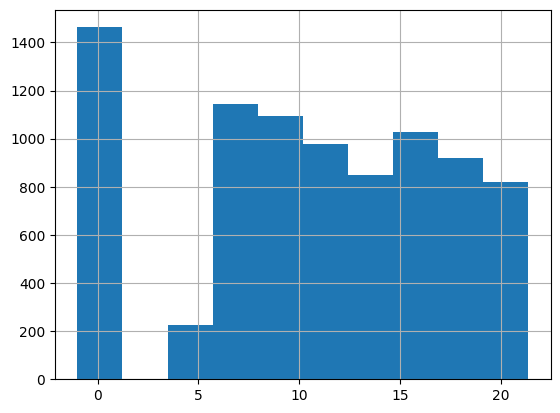

In [12]:
# preview numeric columns
df_sales[num_cols].head()

# create histograms based on the above
item_weight_hist = df_sales['Item_Weight'].hist()

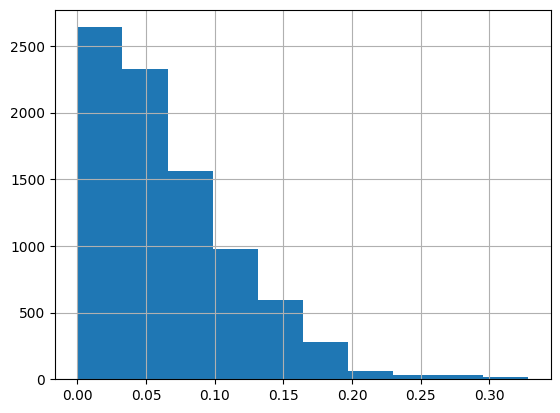

In [13]:
item_visibility_hist = df_sales['Item_Visibility'].hist()

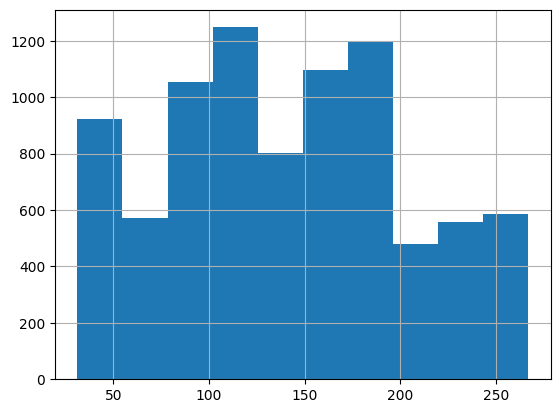

In [14]:
item_mrp_hist = df_sales['Item_MRP'].hist()

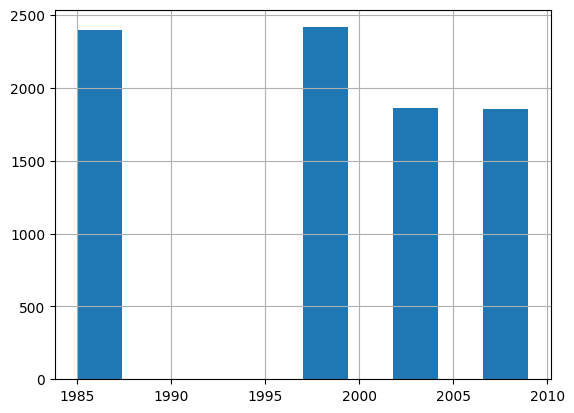

In [15]:
outlet_year_hist = df_sales['Outlet_Establishment_Year'].hist()

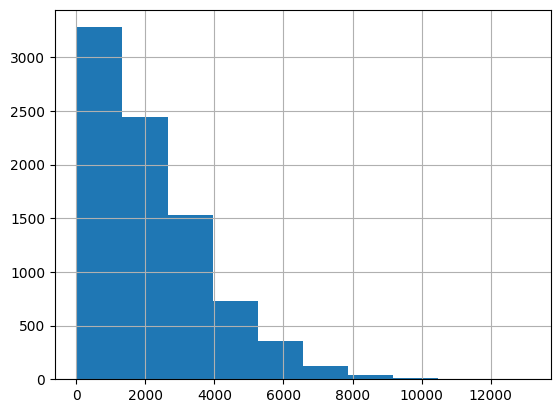

In [16]:
outlet_sales_hist = df_sales['Item_Outlet_Sales'].hist()

### Boxplots to view statistical summaries of numerical features in your dataset.


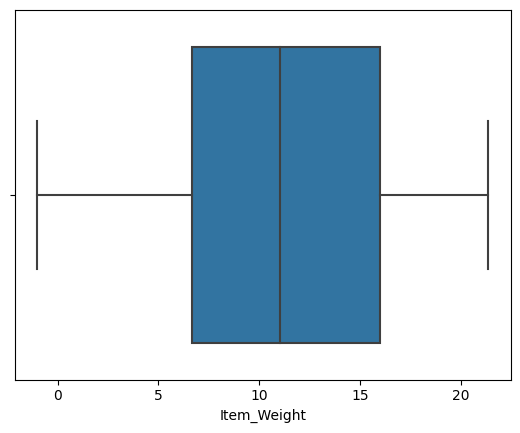

In [17]:
ax1 = sns.boxplot(data=df_sales, x='Item_Weight')

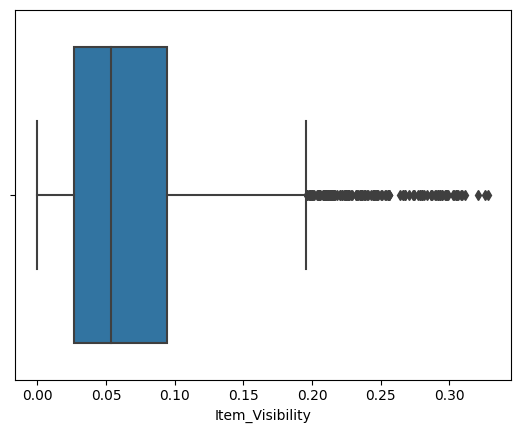

In [18]:
ax2 = sns.boxplot(data=df_sales, x='Item_Visibility')

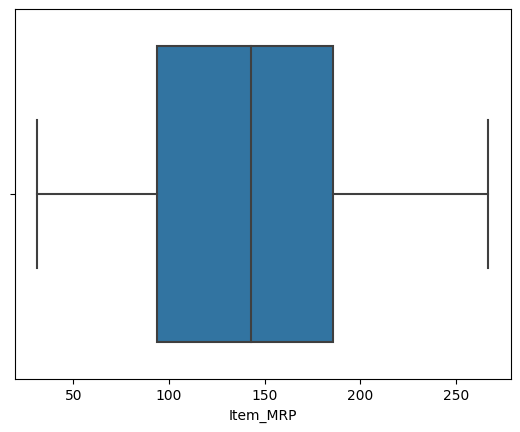

In [19]:
ax3 = sns.boxplot(data=df_sales, x='Item_MRP')

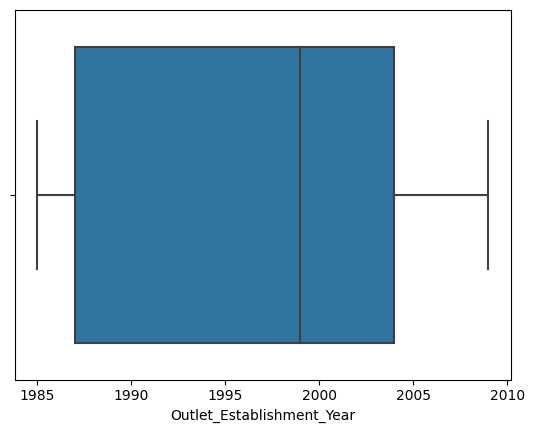

In [20]:
ax4 = sns.boxplot(data=df_sales, x='Outlet_Establishment_Year')

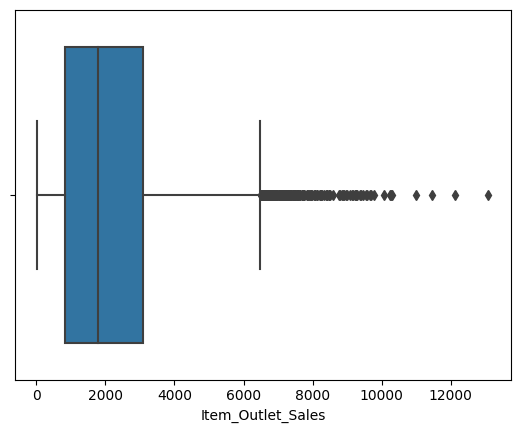

In [21]:
ax5 = sns.boxplot(data=df_sales, x='Item_Outlet_Sales')

### Countplots to view the frequency of each class of categorical features in your dataset.


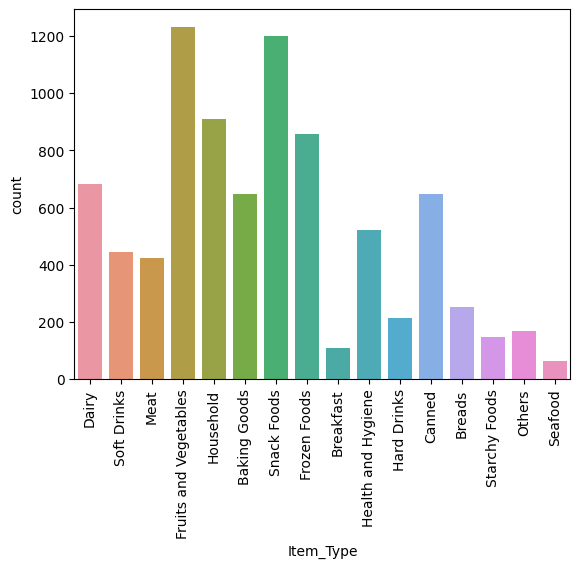

In [22]:
ax = sns.countplot(data=df_sales,x='Item_Type');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

### Heatmap to view the correlation between features.

<ipython-input-23-7cb16845d4ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sales.corr()


<Axes: >

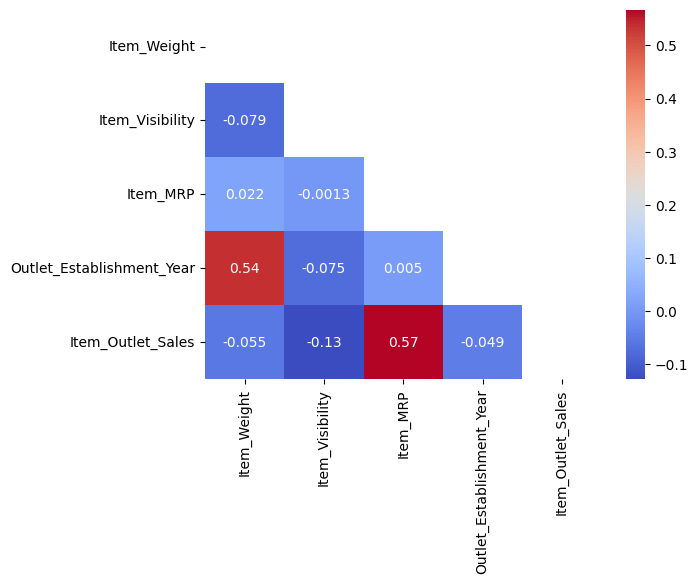

In [23]:
corr = df_sales.corr()
corr.round(2)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, mask = mask)

## Feature Inspection

In [24]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [25]:
# MULTIVARIATE PLOTTING FUNCTIONS FOR EDA

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [26]:
# Remove the placeholders added in week 2 and replace them with null values.
df_sales.replace({-1:np.nan, "MISSING":np.nan}, inplace = True)

## Item_Identifier

Description: Product ID

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `nominal`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `Impute with 'MISSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `1559 unique values, high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, we want to know the Item Identifier in order to track sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`no`

Does this feature appear to be a predictor of the target?

`no`



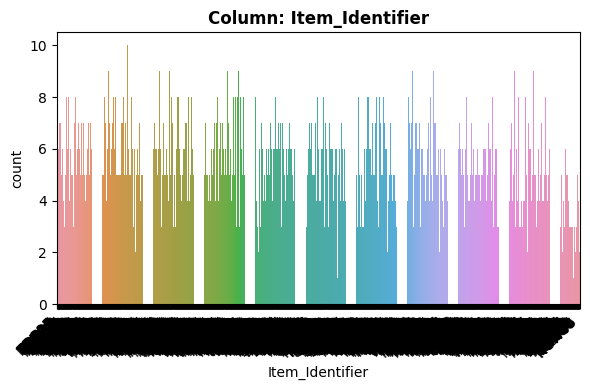

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df_sales, x = 'Item_Identifier', fillna = False);

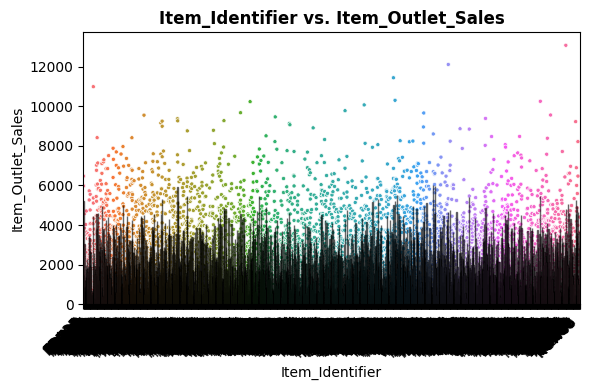

In [28]:
plot_categorical_vs_target(df_sales, x='Item_Identifier', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Item_Weight

Description: Weight of Product

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `numeric`

- How many null values? What percentage?

    `1463, 17.17%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with -1`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `415 unique values, high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `yes, because we don't expect Item Weight to influence sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`no`

Does this feature appear to be a predictor of the target?

`no`

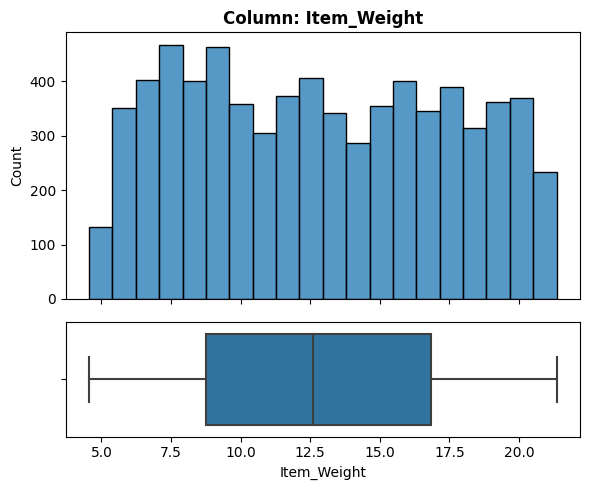

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [29]:
explore_numeric(df_sales, x = 'Item_Weight');

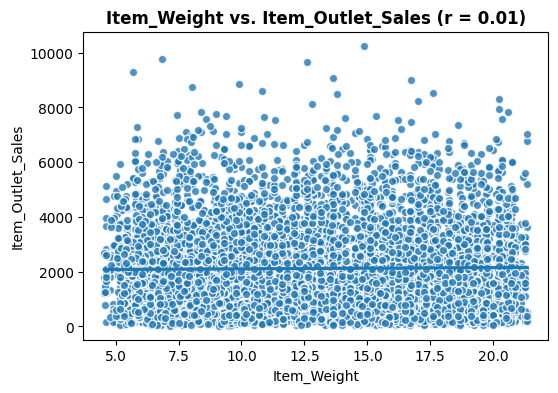

In [30]:
plot_numeric_vs_target(df_sales, x='Item_Weight', y='Item_Outlet_Sales',
                           figsize=(6,4),
                           );

## Item_Fat_Content

Description: Whether the product is low-fat or regular

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `categorical`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `Impute with 'MISSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `2, not high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because there may be a correlation b/w Item Fat Content and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`no`

Does this feature appear to be a predictor of the target?

`no`

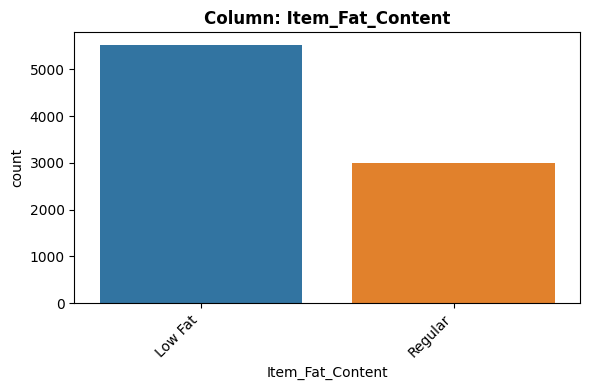

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [31]:
explore_categorical(df_sales, x = 'Item_Fat_Content', fillna = False);

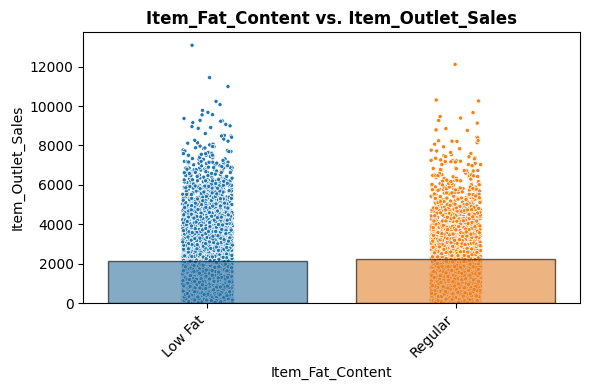

In [32]:
plot_categorical_vs_target(df_sales, x='Item_Fat_Content', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Item_Visibility

Description: The percentage of total display area of all products in a store allocated to the particular product

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `numeric`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `Impute with -1`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `7880 unique values, cardinality = high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because visibility in the store may impact sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`yes, there is a negative correlation between the two: as Item Visibility increases, Item Outlet Sales decreases`

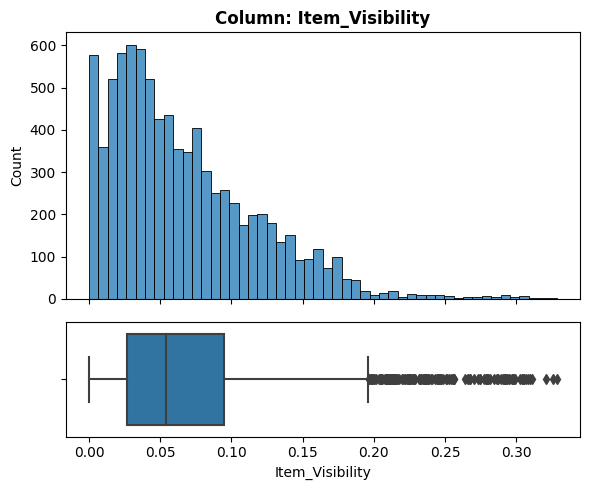

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [33]:
explore_numeric(df_sales, x = 'Item_Visibility');

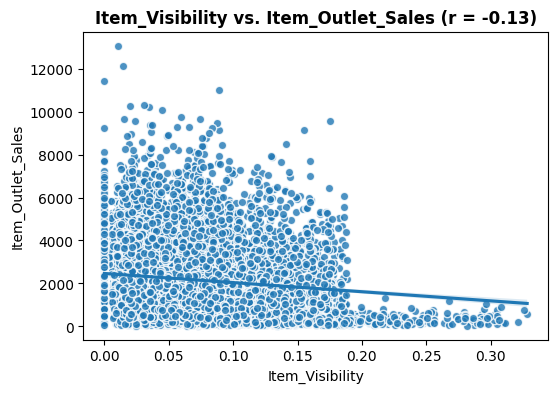

In [34]:
plot_numeric_vs_target(df_sales, x='Item_Visibility', y='Item_Outlet_Sales',
                           figsize=(6,4),
                           );

## Item_Type

Description: The category to which the product belongs

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `categorical`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `Impute with 'MISSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `unique values = 16, cardinality = high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because item type can have a correlation with sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`no, the group means and ranges are similar for each item type`

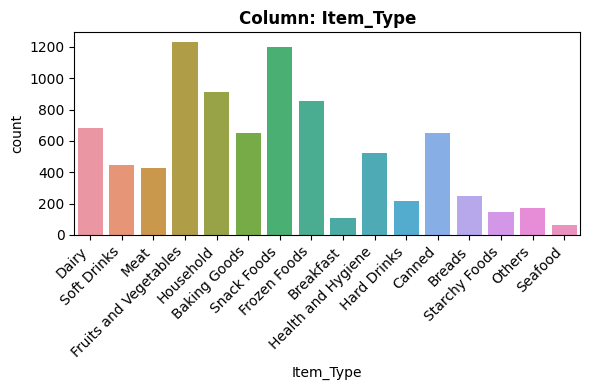

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [35]:
explore_categorical(df_sales, x = 'Item_Type', fillna = False);

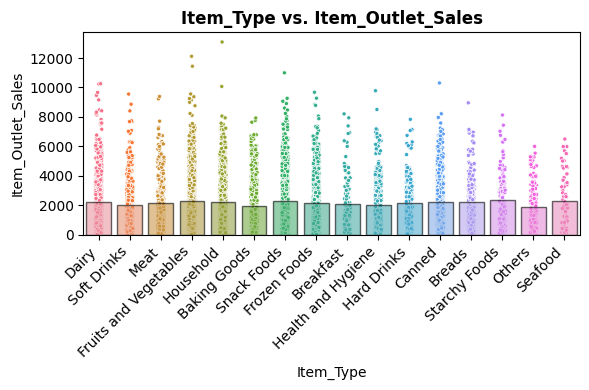

In [36]:
plot_categorical_vs_target(df_sales, x='Item_Type', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Item_MRP

Description: Maximum Retail Price (list price) of the product

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `numeric`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with 'MISSSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `5938 unique values, cardinality = high`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because we might expect MRP to have a correlation with sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`yes, as the Item MRP goes up, so does the Item Outlet Sales`

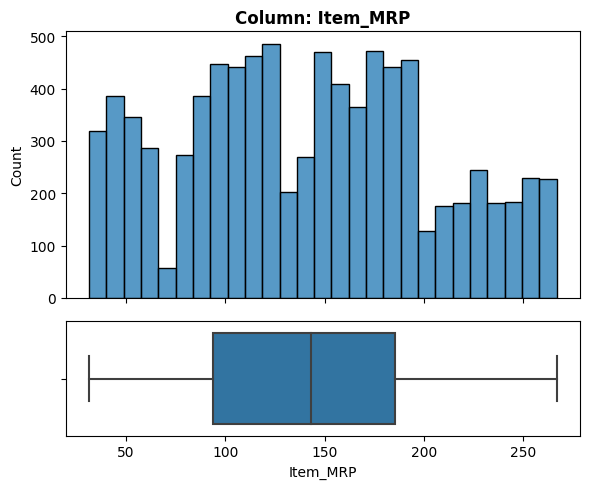

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [37]:
explore_numeric(df_sales, x = 'Item_MRP');

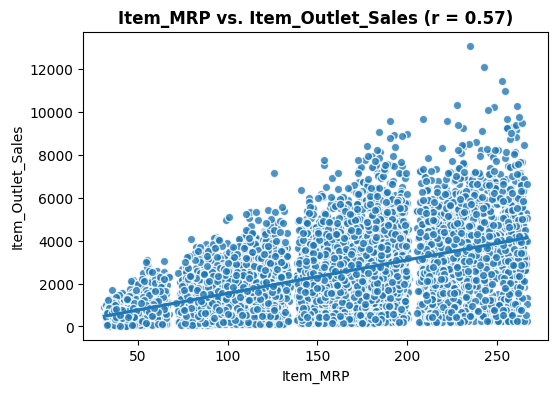

In [38]:
plot_numeric_vs_target(df_sales, x='Item_MRP', y='Item_Outlet_Sales',
                           figsize=(6,4),
                           );

## Outlet_Identifier

Description: Store ID

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `categorical`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute w/ 'MISSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `unique values = 10, cardinality = low

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because we may expect a correlation between stores and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`yes, OUT027 has a higher group mean than the rest of the outlets`

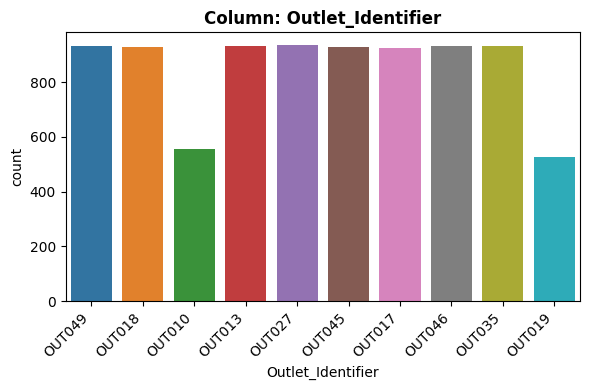

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [39]:
explore_categorical(df_sales, x = 'Outlet_Identifier', fillna = False);

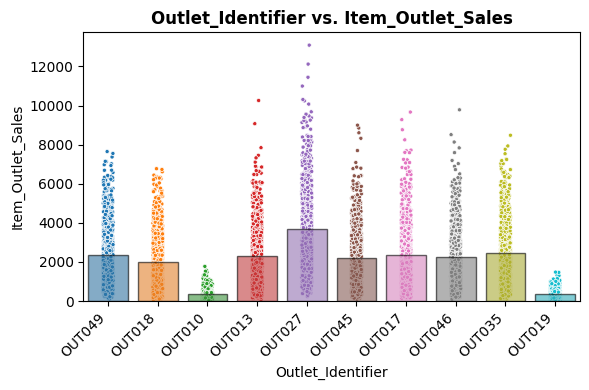

In [40]:
plot_categorical_vs_target(df_sales, x='Outlet_Identifier', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Outlet_Establishment_Year

Description: The year in which store was established

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `nominal`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `MISSING`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant

- What is the cardinality? Is it high (>10)?

    `unique values = 9, cardinality = low`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because we might expect a correlation between year and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`no`

Does this feature appear to be a predictor of the target?

`no, other than that the store builty in 1998 has a lower group mean than the rest of the outlets`

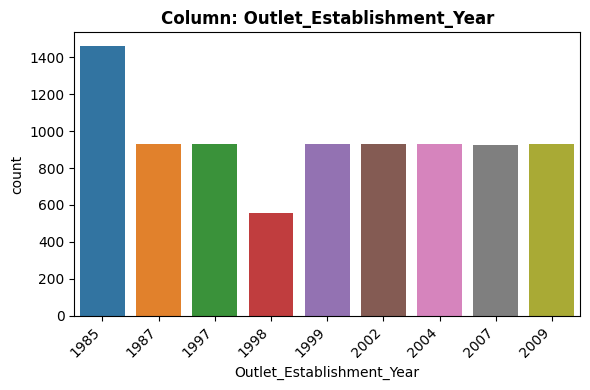

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [41]:
explore_categorical(df_sales, x = 'Outlet_Establishment_Year', fillna = False);

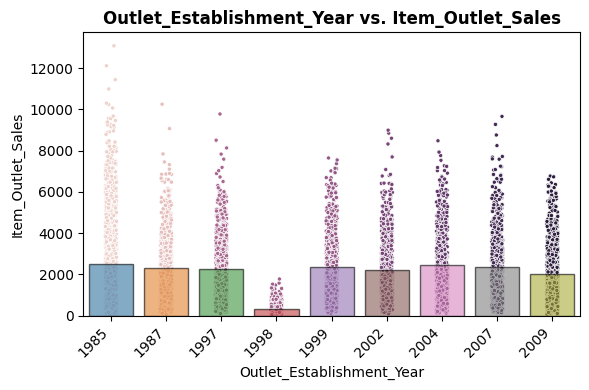

In [42]:
plot_categorical_vs_target(df_sales, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Outlet_Size

Description: The size of the store in terms of ground area covered

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `ordinal`

- How many null values? What percentage?

    `2410, 28.28%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with 'MISSING'`

- Is the feature constant or quasi-constant?
    
    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?
    
    `unique values = 3, cardinality = low`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because there may be a correlation between Outlet Size and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`yes, medium stores have a higher upper range and a higher group mean of sales`

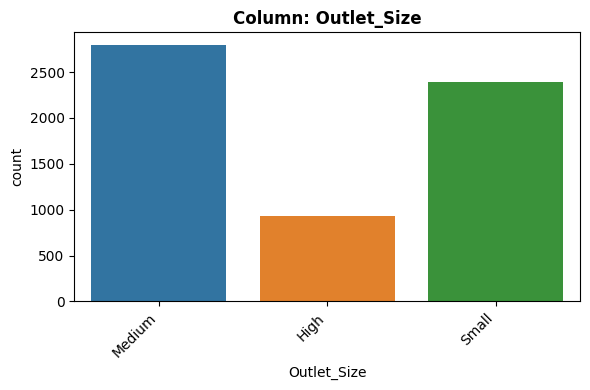

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [43]:
explore_categorical(df_sales, x = 'Outlet_Size', fillna = False);

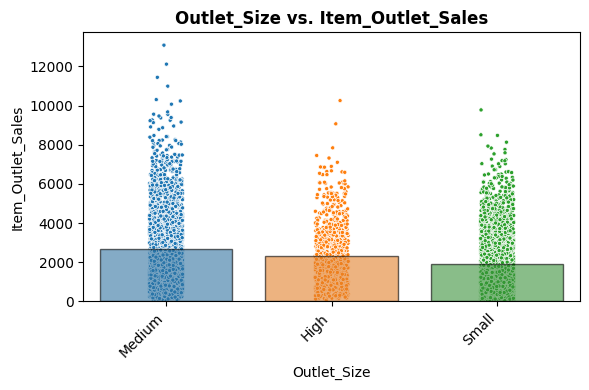

In [44]:
plot_categorical_vs_target(df_sales, x='Outlet_Size', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Outlet_Location_Type

Description: The type of area in which the store is located

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `nominal`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with 'MISSING'`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant`

- What is the cardinality? Is it high (>10)?

    `unique values = 3, cardinality = low`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because there may be a correlation between Outlet Location Type and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`no`

Does this feature appear to be a predictor of the target?

`no`

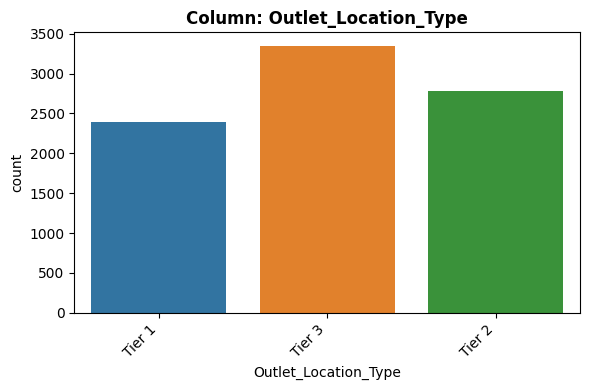

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [45]:
explore_categorical(df_sales, x = 'Outlet_Location_Type', fillna = False);

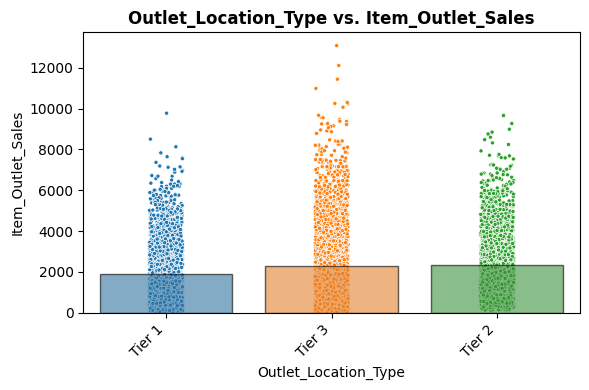

In [46]:
plot_categorical_vs_target(df_sales, x='Outlet_Location_Type', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Outlet_Type

Description: Whether the outlet is a grocery store or some sort of supermarket

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `nominal`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with 'MISSING'

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant

- What is the cardinality? Is it high (>10)?

    `unique values = 4, cardinality = low`

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, because there may be a correlation between Outlet Type and sales`

### Multivariate Viz Questions:

Based on your business understanding, would you expect this feature to be a predictor of the target?

`yes`

Does this feature appear to be a predictor of the target?

`yes, Type 3 Supermarkets have a higher group mean and higher range of item sales`

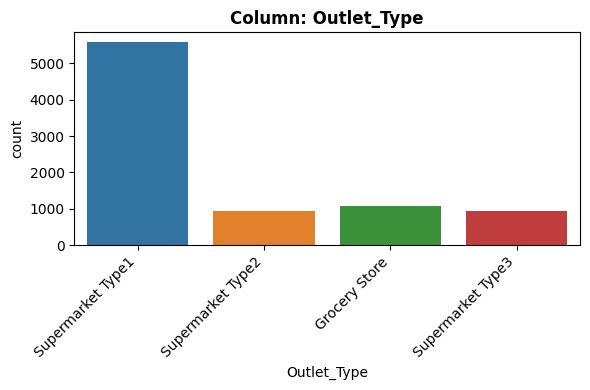

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(df_sales, x = 'Outlet_Type', fillna = False);

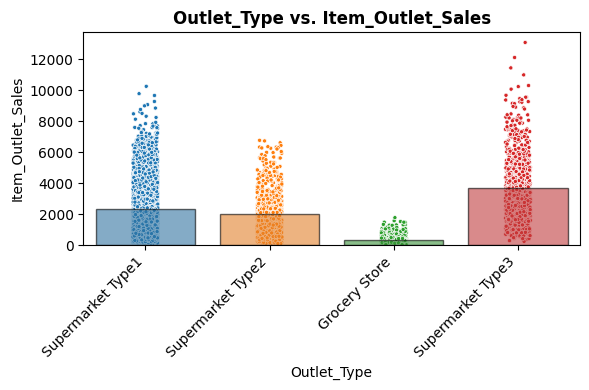

In [48]:
plot_categorical_vs_target(df_sales, x='Outlet_Type', y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = False);

## Item_Outlet_Sales

Description: Sales of the product in the particular store. This is the target variable to be predicted.

### Univariate Viz Questions:

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

    `numeric`

- How many null values? What percentage?

    `0, 0%`

- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    `impute with -1`

- Is the feature constant or quasi-constant?

    `not constant, not quasi-constant

- What is the cardinality? Is it high (>10)?

    `unique values = 3493, cardinality = high

- Would we know this feature before the target is determined?

    `yes`

- Is there a business case/understanding reason to exclude based on our business case?

    `no, it is the target`

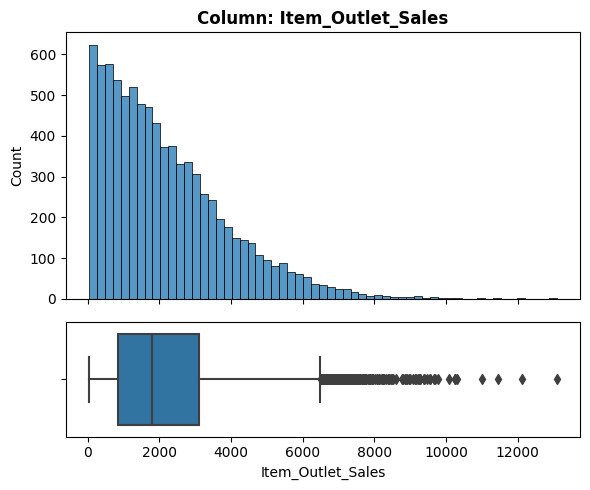

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [49]:
explore_numeric(df_sales, x = 'Item_Outlet_Sales');